In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [138]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [139]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [141]:
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"Null values in {column}: {null_count}")

Null values in id: 0
Null values in gender: 0
Null values in age: 0
Null values in hypertension: 0
Null values in heart_disease: 0
Null values in ever_married: 0
Null values in work_type: 0
Null values in Residence_type: 0
Null values in avg_glucose_level: 0
Null values in bmi: 201
Null values in smoking_status: 0
Null values in stroke: 0


In [142]:
for column in df.columns:
  print(column)
  print(df[column].unique())
  print(df[column].dtype,"\n")

id
[ 9046 51676 31112 ... 19723 37544 44679]
int64 

gender
['Male' 'Female' 'Other']
object 

age
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-

In [143]:
other_gender_count = (df['gender'] == 'Other').sum()

print("Number of rows with gender 'Other':", other_gender_count)


Number of rows with gender 'Other': 1


In [144]:
df = df[df['gender'] != 'Other']

median_bmi = df['bmi'].median()
df['bmi'].fillna(median_bmi, inplace=True)

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [145]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print(df[i].dtype,"\n")

id
[ 9046 51676 31112 ... 19723 37544 44679]
int64 

gender
['Male' 'Female']
object 

age
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e

In [146]:

for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"Null values in {column}: {null_count}")


Null values in id: 0
Null values in gender: 0
Null values in age: 0
Null values in hypertension: 0
Null values in heart_disease: 0
Null values in ever_married: 0
Null values in work_type: 0
Null values in Residence_type: 0
Null values in avg_glucose_level: 0
Null values in bmi: 0
Null values in smoking_status: 0
Null values in stroke: 0


In [147]:
label_encoder = LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

# Display the first few rows of the dataframe after encoding
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3518,5223,0,21.0,0,0,0,2,0,78.32,27.0,0,0
2950,34122,0,17.0,0,0,0,2,1,87.72,25.9,3,0
3792,44259,0,74.0,0,0,1,2,1,130.37,26.3,0,0
428,59906,0,40.0,0,0,1,2,0,139.90,31.7,3,0
3592,51073,0,34.0,0,0,1,3,1,79.77,33.6,2,0
747,58227,0,64.0,0,0,1,0,0,62.41,30.0,2,0
4764,25149,0,3.0,0,0,0,4,0,79.76,15.6,0,0
330,59368,0,78.0,0,0,1,2,1,243.50,26.1,2,0
2278,65632,1,42.0,0,0,1,2,0,145.50,31.8,1,0
277,36275,0,54.0,0,0,1,2,0,206.72,26.7,2,0


In [148]:

X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

numerical_cols = ['age', 'avg_glucose_level', 'bmi']


In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

smote = SMOTE(random_state=42)
resampled_X_train, resampled_Y_train = smote.fit_resample(X_train, y_train)

In [158]:
np.unique(resampled_Y_train, return_counts=True)

(array([0, 1], dtype=int64), array([3900, 3900], dtype=int64))

In [150]:
# best_random_state = None
best_entropy = None
best_accuracy = 0
best_params = None

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# for random_state in range(1, 101):
for criterion in param_grid['criterion']:
   
    model = RandomForestClassifier(random_state=42, criterion=criterion, n_jobs=-1)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_weighted', cv=5)

    grid_search.fit(resampled_X_train, resampled_Y_train)
       
    if grid_search.best_score_ > best_accuracy:
        best_accuracy = grid_search.best_score_
            # best_random_state = random_state
        best_entropy = criterion
        best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

final_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], criterion=best_params['criterion'], random_state=42)
final_model.fit(resampled_X_train, resampled_Y_train)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestClassifier(n_estimators=200, random_state=42)

Confusion Matrix:
 [[878  82]
 [ 46  16]]
Accuracy: 0.8748
Precision: 0.1633
Recall: 0.2581
F1 Score: 0.2000
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       960
           1       0.16      0.26      0.20        62

    accuracy                           0.87      1022
   macro avg       0.56      0.59      0.57      1022
weighted avg       0.90      0.87      0.89      1022



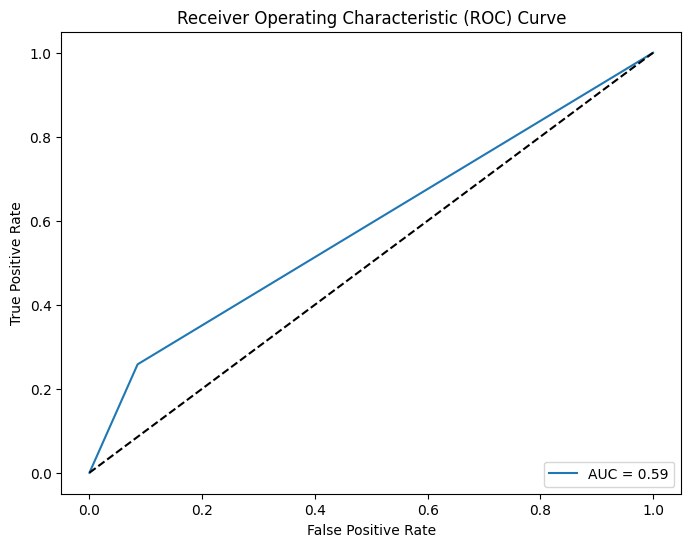

AUC: 0.5863


In [151]:
y_pred = final_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.4f}")


In [152]:
# Sample input data for testing predictions
new_data = {
    'gender': 1,
    'age': 55,
    'hypertension': 1,
    'heart_disease': 0,
    'ever_married': 1,
    'work_type': 2,
    'Residence_type': 2,
    'avg_glucose_level': 85.5,
    'bmi': 28.0,
    'smoking_status': 1
}

new_df = pd.DataFrame([new_data])

prediction = final_model.predict(new_df)

# Print the prediction
print("Prediction:", prediction[0])


Prediction: 0


In [153]:

data_to_predict = {
    'gender': 'Male',
    'age': 55,
    'hypertension': 1,
    'heart_disease': 0,
    'ever_married': 'Yes',
    'work_type': 'Private',
    'Residence_type': 'Urban',
    'avg_glucose_level': 85.5,
    'bmi': 28.0,
    'smoking_status': 'formerly smoked'
}

data_to_predict_df = pd.DataFrame([data_to_predict])

data_to_predict_df['gender'] = (data_to_predict_df['gender'] == 'Male').astype(int)
data_to_predict_df['ever_married'] = (data_to_predict_df['ever_married'] == 'Yes').astype(int)
work_type_mapping = {'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4}
data_to_predict_df['work_type'] = data_to_predict_df['work_type'].map(work_type_mapping)
data_to_predict_df['Residence_type'] = (data_to_predict_df['Residence_type'] == 'Urban').astype(int)
smoking_status_mapping = {'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3}
data_to_predict_df['smoking_status'] = data_to_predict_df['smoking_status'].map(smoking_status_mapping)

prediction = final_model.predict(data_to_predict_df)

print("Prediction:", prediction[0])


Prediction: 0
